In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Analysis

In [3]:
df = pd.read_csv("/kaggle/input/student-performance/StudentPerformance.csv")

In [4]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df['Extracurricular Activities'] = [1 if x == 'Yes' else 0 for x in df['Extracurricular Activities']]

In [8]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [9]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


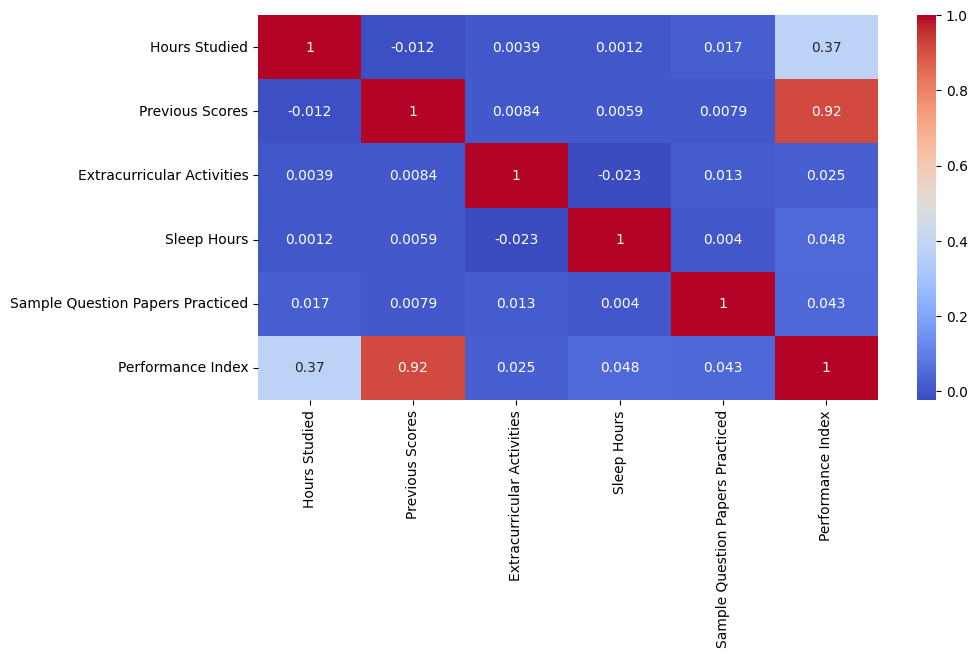

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

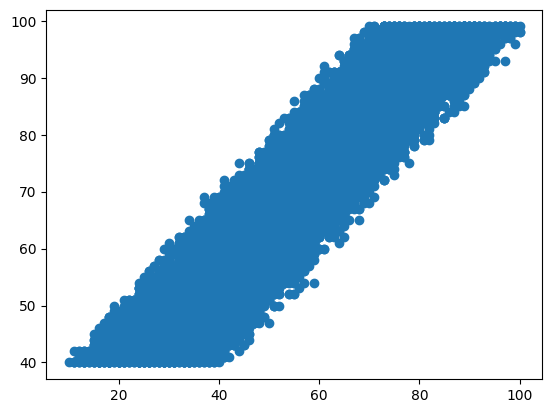

In [11]:
plt.scatter(x=df['Performance Index'], y=df['Previous Scores'])
plt.show()

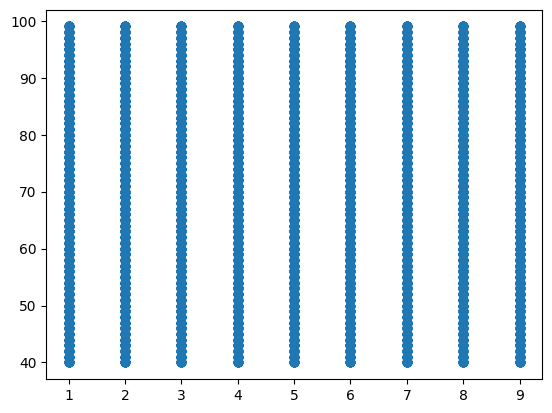

In [12]:
plt.scatter(x=df['Hours Studied'], y=df['Previous Scores'])
plt.show()

### Model Training & Predictions

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [14]:
X = df.drop(['Performance Index'], axis=1)
Y = df['Performance Index']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linear_model = LinearRegression()

In [18]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = linear_model.predict(x_test)

In [20]:
print("R-squared score : ", r2_score(y_test, y_pred))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))

R-squared score :  0.9889832909573145
Mean Absolute Error :  1.6111213463123044
Mean Squared Error :  4.082628398521853


#### Logistics Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [21]:
df['status'] = [1 if x >= 33 else 0 for x in df['Performance Index']]

In [22]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,status
0,7,99,1,9,1,91.0,1
1,4,82,0,4,2,65.0,1
2,8,51,1,7,2,45.0,1
3,5,52,1,5,2,36.0,1
4,7,75,0,8,5,66.0,1


In [24]:
X = df.drop(['Performance Index', 'status'], axis=1)
Y = df['status']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [29]:
log_model = LogisticRegression()

In [30]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred = log_model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.98


In [34]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       281
           1       0.98      0.99      0.99      1719

    accuracy                           0.98      2000
   macro avg       0.96      0.94      0.95      2000
weighted avg       0.98      0.98      0.98      2000

